In [1]:
import skimage
from skimage import data
from skimage import io
import skimage.morphology as morphology
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def calculatePlotSpectrum(image, element, areaFunc, subtrFunc):
    pos = []
    neg = []
    
    pos.append(areaFunc(subtrFunc(image, morphology.opening(image, element))))

    prev_element = element
    
    prev_opening = None
    prev_closing = None
    while True:
        if prev_opening is None:
            prev_opening = morphology.opening(image, prev_element)
        if prev_closing is None:
            prev_closing = morphology.closing(image, prev_element)
        
        new_element_size = len(prev_element) + len(element) - 1
        new_element = np.zeros((new_element_size, new_element_size), dtype=np.bool)
        index = len(element) // 2
        new_element[index : -index, index : -index] = prev_element
        
        cur_element = morphology.dilation(new_element, element)
        
        opening = morphology.opening(image, cur_element)
        closing = morphology.closing(image, cur_element) 
        
        pos.append(areaFunc(subtrFunc(prev_opening, opening)))
        neg.append(areaFunc(subtrFunc(closing, prev_closing)))
        
        if np.array_equal(closing, prev_closing) and np.array_equal(opening, prev_opening):
            break
        
        prev_element, prev_opening, prev_closing = cur_element, opening, closing
    
    values = neg[::-1] + pos
    
    boundary = len(values) // 2
    plt.bar([i for i in range(-boundary, boundary + 1)], values)
    plt.show() 

# Binary case

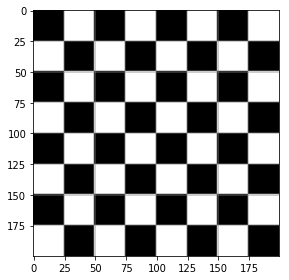

In [3]:
image = data.checkerboard()
image = np.invert(image)
io.imshow(image)
io.show()

def runBinary(str_element):
    calculatePlotSpectrum(image, str_element,
                      (lambda im: np.count_nonzero(im)), 
                      (lambda a, b: np.logical_and(a, np.logical_not(b))))

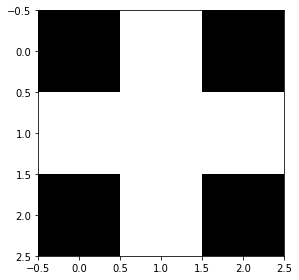

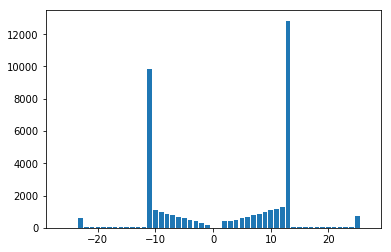

In [4]:
structuring_element = morphology.disk(1, dtype=np.bool)
io.imshow(structuring_element)
io.show()

runBinary(structuring_element)

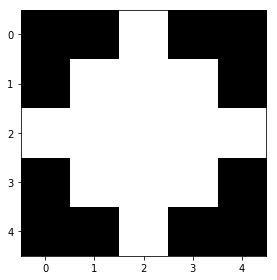

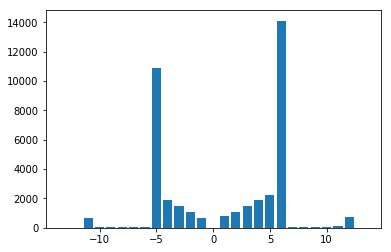

In [5]:
structuring_element = morphology.disk(2, dtype=np.bool)
io.imshow(structuring_element)
io.show()

runBinary(structuring_element)

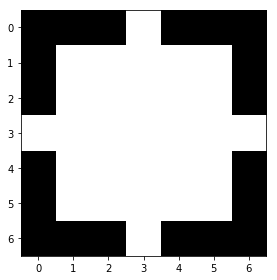

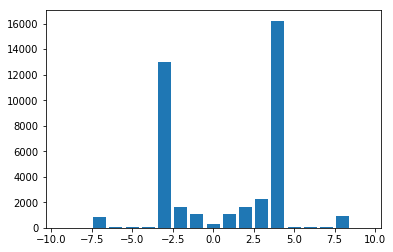

In [6]:
structuring_element = morphology.disk(3, dtype=np.bool)
io.imshow(structuring_element)
io.show()

runBinary(structuring_element)

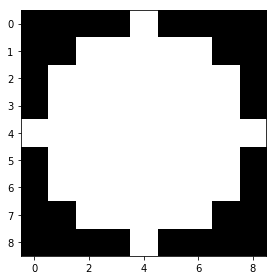

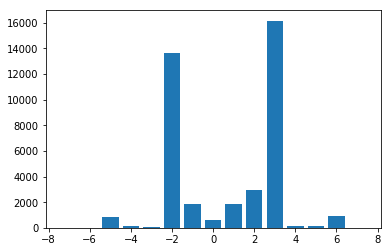

In [7]:
structuring_element = morphology.disk(4, dtype=np.bool)
io.imshow(structuring_element)
io.show()

runBinary(structuring_element)

# Grayscale case

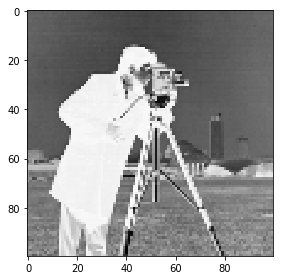

In [8]:
image = data.camera()
image = np.invert(image)
# Resizing here is a way to be able to converge in a foreseeable time.
image = skimage.transform.resize(image, (100,100), mode='constant')

io.imshow(image)
io.show()

def runGrayscale(str_element):
    calculatePlotSpectrum(image, str_element,
                      (lambda im: np.sum(im)), 
                      (lambda a, b: a - b))

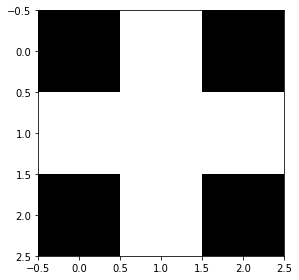

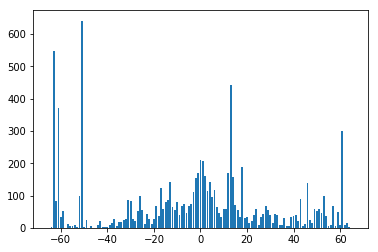

In [9]:
structuring_element = morphology.disk(1, dtype=np.float)
io.imshow(structuring_element)
io.show()

runGrayscale(structuring_element)

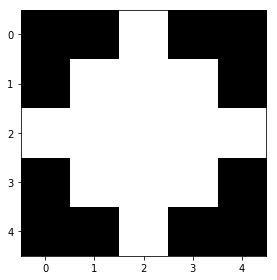

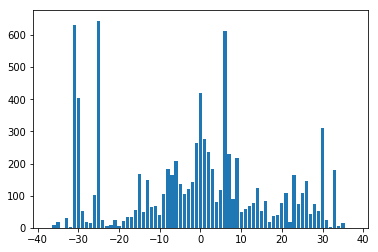

In [10]:
structuring_element = morphology.disk(2, dtype=np.float)
io.imshow(structuring_element)
io.show()

runGrayscale(structuring_element)

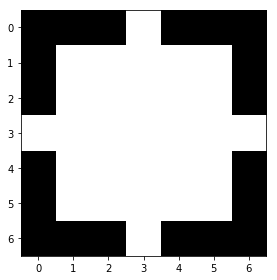

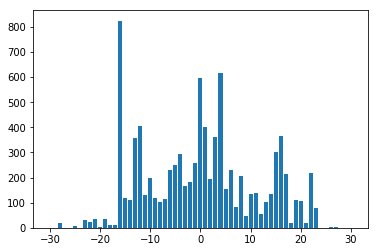

In [11]:
structuring_element = morphology.disk(3, dtype=np.float)
io.imshow(structuring_element)
io.show()

runGrayscale(structuring_element)

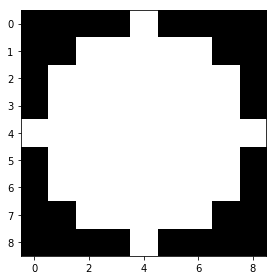

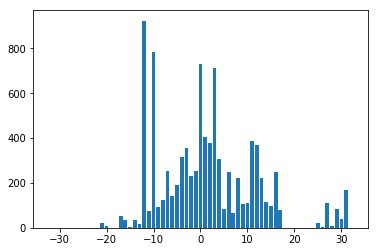

In [12]:
structuring_element = morphology.disk(4, dtype=np.float)
io.imshow(structuring_element)
io.show()

runGrayscale(structuring_element)